In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Specify the path to your Excel file
file_path = "HLPCA-06086-2011_H14_census.xlsx"

# Read the file (default sheet is read unless you specify otherwise)
df = pd.read_excel(file_path, sheet_name="Sheet1", header=[0, 3])  # change sheet_name if needed

# Display the first few rows of the DataFrame
df.head()


HOUSELISTING & HOUSING CENSUS, 2011                                         \
                           State Code State Name District Code District Name   
0                                 NaN        NaN           NaN           NaN   
1                                 NaN        NaN           NaN           NaN   
2                                 1.0          2           3.0             4   
3                                 6.0    HARYANA          86.0       Gurgaon   
4                                 6.0    HARYANA          86.0       Gurgaon   

                                                                              \
  Tehsil Code Tehsil Name Town Code/Village code Ward No           Area Name   
0         NaN         NaN                    NaN     NaN                 NaN   
1         NaN         NaN                    NaN     NaN                 NaN   
2         5.0           6                    7.0     8.0                   9   
3         0.0     Gurgaon                    0.0     0.0  District - Gurgaon   
4         0.0     Gurgaon                    0.0     0.0  District - Gurgaon   

                 ...                                                      \
  Rural/\nUrban  ...   Availability of assets.8 Availability of assets.9   
0           NaN  ...  Scooter/ Motorcycle/Moped            Car/ Jeep/Van   
1           NaN  ...                        NaN                      NaN   
2            10  ...                        136                      137   
3         Total  ...                         41                       29   
4         Rural  ...                       36.9                     10.4   

                                                      \
                           Availability of assets.10   
0  Households with TV, Computer/Laptop, Telephone...   
1                                                NaN   
2                                                138   
3                                               27.1   
4                                                4.6   

                                                  \
                       Availability of assets.11   
0  None of the assets specified in col. 10 to 19   
1                                            NaN   
2                                            139   
3                                              7   
4                                           11.4   

                                                    \
  Households by Type of Structure of Census Houses   
0                                              NaN   
1                                        Permanent   
2                                              140   
3                                             94.6   
4                                               96   

                                                      \
  Households by Type of Structure of Census Houses.1   
0                                                NaN   
1                                     Semi-Permanent   
2                                                141   
3                                                2.6   
4                                                2.7   

                                                      \
  Households by Type of Structure of Census Houses.2   
0                                                NaN   
1                                    Total Temporary   
2                                                142   
3                                                2.3   
4                                                  1   

                                                      \
  Households by Type of Structure of Census Houses.3   
0                                                NaN   
1                                        Serviceable   
2                                                143   
3                                                0.5   
4                                                0.8   

                               

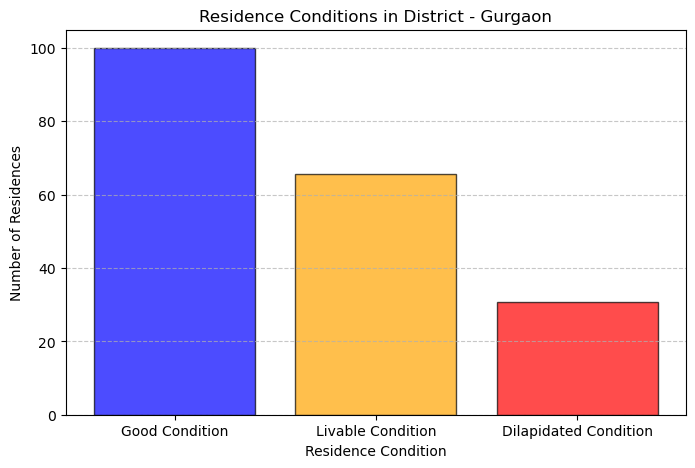

In [11]:
# Load the dataset (Replace with your actual file path)
file_path = "HLPCA-06086-2011_H14_census.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1", header=[0, 3])

# Flatten multi-level headers
df.columns = [' '.join(map(str, col)).strip() for col in df.columns]

# Define column names
area_col = "HOUSELISTING & HOUSING CENSUS, 2011 Area Name"
residence_cols = [
    "HOUSELISTING & HOUSING CENSUS, 2011 Number of households with condition of Census House as",
    "HOUSELISTING & HOUSING CENSUS, 2011 Number of households with condition of Census House as .1",
    "HOUSELISTING & HOUSING CENSUS, 2011 Number of households with condition of Census House as .2"
]

# Select relevant columns
df_filtered = df[[area_col] + residence_cols].dropna()

# Convert numerical columns
df_filtered[residence_cols] = df_filtered[residence_cols].apply(pd.to_numeric, errors='coerce')

# Rename columns for better readability
df_filtered.columns = ["Area Name", "Good Condition", "Livable Condition", "Dilapidated Condition"]

# User-defined area to filter
selected_area = "District - Gurgaon"  # Change this to the area you want

# Filter dataset for the selected area
df_area = df_filtered[df_filtered["Area Name"] == selected_area]

# Plot all residence conditions for the selected area
plt.figure(figsize=(8, 5))
plt.bar(["Good Condition", "Livable Condition", "Dilapidated Condition"], 
        [df_area["Good Condition"].values[0], df_area["Livable Condition"].values[0], df_area["Dilapidated Condition"].values[0]],
        color=['blue', 'orange', 'red'], alpha=0.7, edgecolor='black')

# Customize the plot
plt.title(f"Residence Conditions in {selected_area}")
plt.xlabel("Residence Condition")
plt.ylabel("Number of Residences")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


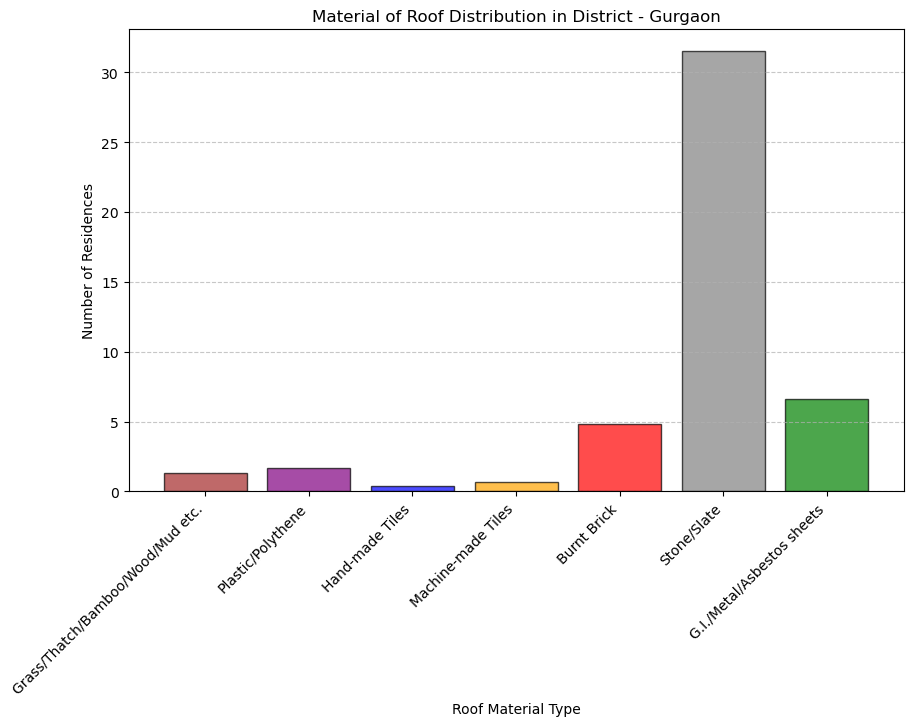

In [12]:
roof_material_cols = [
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Roof",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Roof.1",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Roof.2",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Roof.3",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Roof.4",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Roof.5",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Roof.6"
]

# Select relevant columns
df_filtered = df[[area_col] + roof_material_cols].dropna()

# Convert numerical columns
df_filtered[roof_material_cols] = df_filtered[roof_material_cols].apply(pd.to_numeric, errors='coerce')

# Rename columns for better readability
df_filtered.columns = [
    "Area Name",
    "Grass/Thatch/Bamboo/Wood/Mud etc.",
    "Plastic/Polythene",
    "Hand-made Tiles",
    "Machine-made Tiles",
    "Burnt Brick",
    "Stone/Slate",
    "G.I./Metal/Asbestos sheets"
]

# User-defined area to filter
selected_area = "District - Gurgaon"  # Change this to the area you want

# Filter dataset for the selected area
df_area = df_filtered[df_filtered["Area Name"] == selected_area]

# Plot all roof material types for the selected area
plt.figure(figsize=(10, 6))
plt.bar(df_area.columns[1:], df_area.iloc[0, 1:], color=['brown', 'purple', 'blue', 'orange', 'red', 'gray', 'green'], alpha=0.7, edgecolor='black')

# Customize the plot
plt.title(f"Material of Roof Distribution in {selected_area}")
plt.xlabel("Roof Material Type")
plt.ylabel("Number of Residences")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


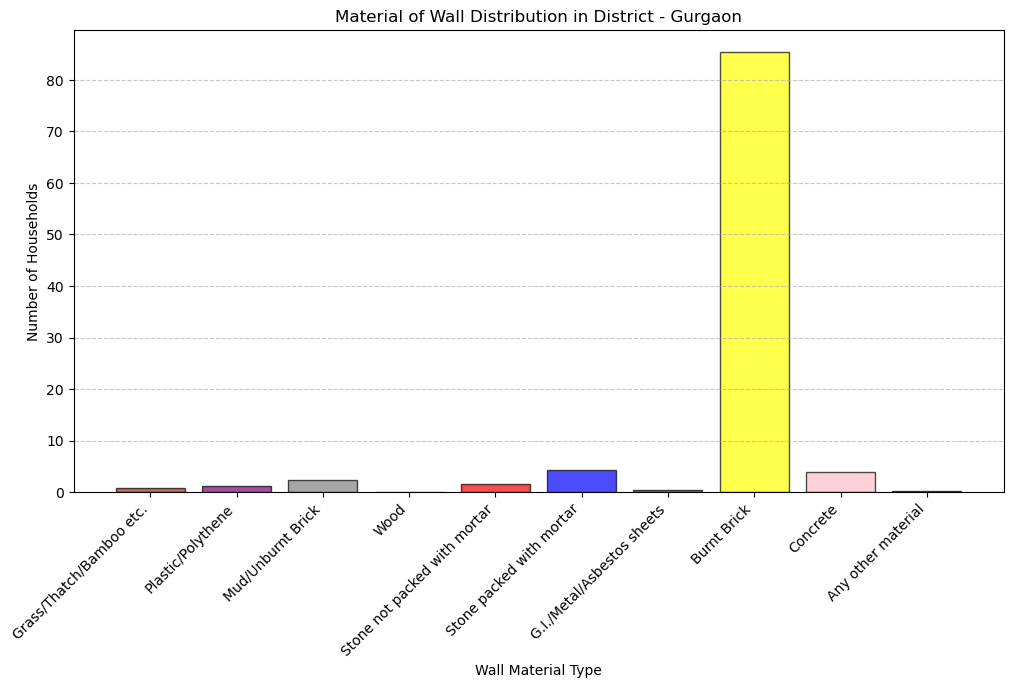

In [13]:
# Identifying the correct columns for material of wall
wall_material_cols = [
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Wall",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Wall.1",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Wall.2",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Wall.3",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Wall.4",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Wall.5",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Wall.6",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Wall.7",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Wall.8",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Wall.9"
]

# Selecting relevant columns
columns_to_plot = [area_col] + wall_material_cols

# Filtering dataset for relevant columns and dropping NaN values
df_filtered = df[columns_to_plot].dropna()

# Convert numerical columns to proper numeric format (ignoring errors for non-numeric values)
df_filtered[wall_material_cols] = df_filtered[wall_material_cols].apply(pd.to_numeric, errors='coerce')

# Renaming columns for better readability
df_filtered.columns = [
    "Area Name", "Grass/Thatch/Bamboo etc.", "Plastic/Polythene", "Mud/Unburnt Brick", "Wood",
    "Stone not packed with mortar", "Stone packed with mortar", "G.I./Metal/Asbestos sheets", 
    "Burnt Brick", "Concrete", "Any other material"
]

# User-defined area to filter
selected_area = "District - Gurgaon"  # Change this to the area you want

# Filter dataset for the selected area
df_area = df_filtered[df_filtered["Area Name"] == selected_area]

# Plot material of wall distribution for the selected area
plt.figure(figsize=(12, 6))
plt.bar(df_area.columns[1:], df_area.iloc[0, 1:], 
        color=['brown', 'purple', 'gray', 'orange', 'red', 'blue', 'green', 'yellow', 'pink', 'black'],
        alpha=0.7, edgecolor='black')

# Customize the plot
plt.title(f"Material of Wall Distribution in {selected_area}")
plt.xlabel("Wall Material Type")
plt.ylabel("Number of Households")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


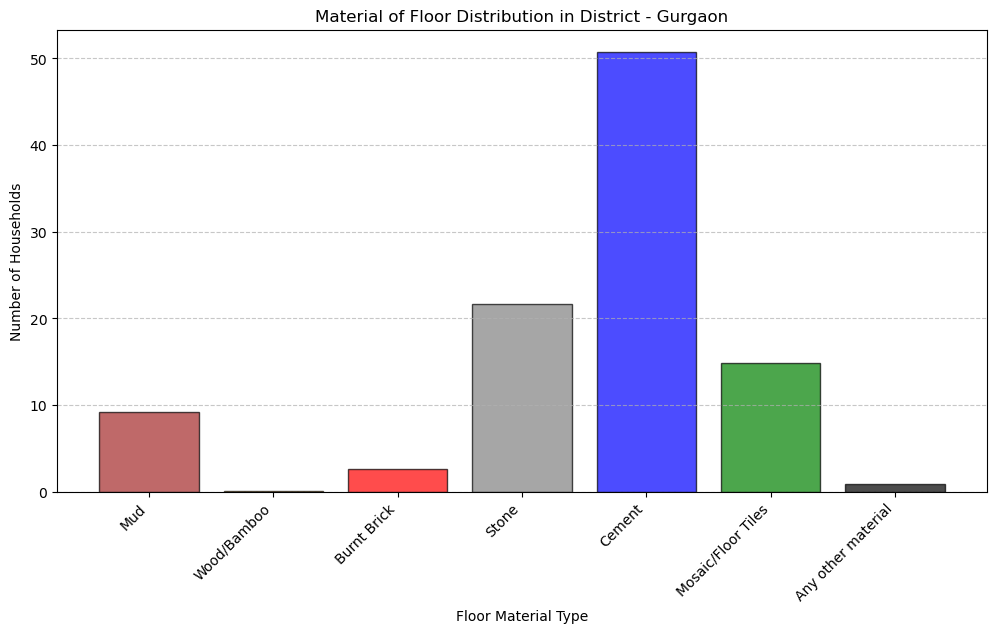

In [10]:
# Identifying the correct columns for material of floor
floor_material_cols = [
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Floor",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Floor.1",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Floor.2",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Floor.3",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Floor.4",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Floor.5",
    "HOUSELISTING & HOUSING CENSUS, 2011 Material of Floor.6"
]

# Selecting relevant columns
columns_to_plot = [area_col] + floor_material_cols

# Filtering dataset for relevant columns and dropping NaN values
df_filtered = df[columns_to_plot].dropna()

# Convert numerical columns to proper numeric format (ignoring errors for non-numeric values)
df_filtered[floor_material_cols] = df_filtered[floor_material_cols].apply(pd.to_numeric, errors='coerce')

# Renaming columns for better readability
df_filtered.columns = [
    "Area Name", "Mud", "Wood/Bamboo", "Burnt Brick", "Stone",
    "Cement", "Mosaic/Floor Tiles", "Any other material"
]

# User-defined area to filter
selected_area = "District - Gurgaon"  # Change this to the area you want

# Filter dataset for the selected area
df_area = df_filtered[df_filtered["Area Name"] == selected_area]

# Plot material of floor distribution for the selected area
plt.figure(figsize=(12, 6))
plt.bar(df_area.columns[1:], df_area.iloc[0, 1:], 
        color=['brown', 'orange', 'red', 'gray', 'blue', 'green', 'black'],
        alpha=0.7, edgecolor='black')

# Customize the plot
plt.title(f"Material of Floor Distribution in {selected_area}")
plt.xlabel("Floor Material Type")
plt.ylabel("Number of Households")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


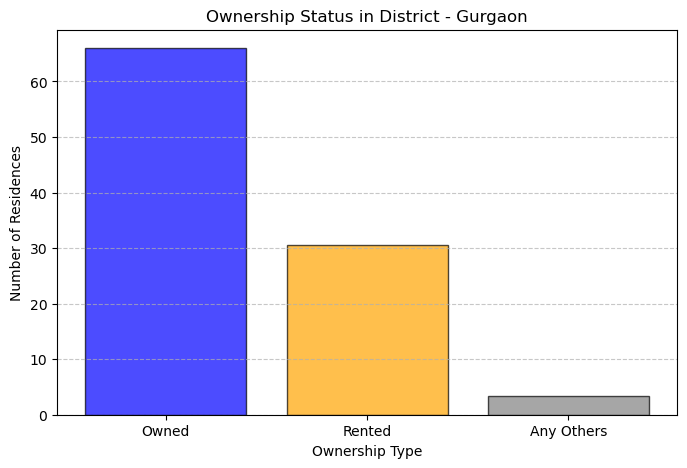

In [14]:
# Identifying the correct ownership status columns
ownership_cols = [
    "HOUSELISTING & HOUSING CENSUS, 2011 Ownership status",
    "HOUSELISTING & HOUSING CENSUS, 2011 Ownership status.1",
    "HOUSELISTING & HOUSING CENSUS, 2011 Ownership status.2"
]

# Selecting relevant columns
columns_to_plot = [area_col] + ownership_cols

# Filtering dataset for relevant columns and dropping NaN values
df_filtered = df[columns_to_plot].dropna()

# Convert numerical columns to proper numeric format (ignoring errors for non-numeric values)
df_filtered[ownership_cols] = df_filtered[ownership_cols].apply(pd.to_numeric, errors='coerce')

# Renaming columns for better readability
df_filtered.columns = ["Area Name", "Owned", "Rented", "Any Others"]

# User-defined area to filter
selected_area = "District - Gurgaon"  # Change this to the area you want

# Filter dataset for the selected area
df_area = df_filtered[df_filtered["Area Name"] == selected_area]

# Plot ownership status distribution for the selected area
plt.figure(figsize=(8, 5))
plt.bar(["Owned", "Rented", "Any Others"], 
        [df_area["Owned"].values[0], df_area["Rented"].values[0], df_area["Any Others"].values[0]],
        color=['blue', 'orange', 'gray'], alpha=0.7, edgecolor='black')

# Customize the plot
plt.title(f"Ownership Status in {selected_area}")
plt.xlabel("Ownership Type")
plt.ylabel("Number of Residences")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


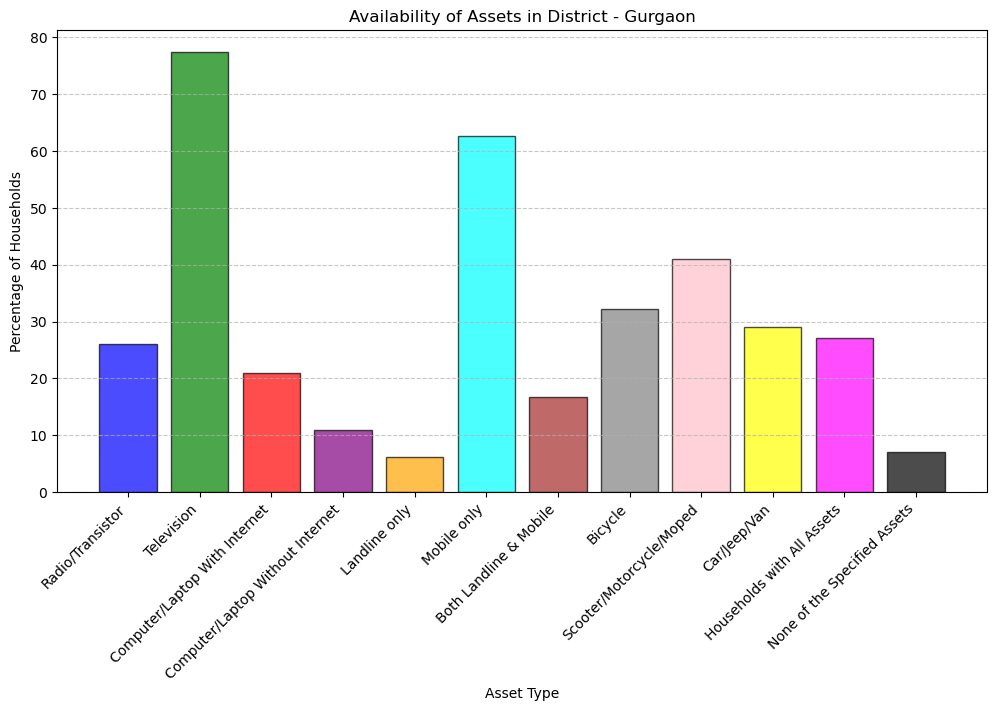

In [15]:
# Identifying the correct asset availability columns
asset_cols = [
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.1",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.2",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.3",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.4",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.5",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.6",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.7",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.8",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.9",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.10",
    "HOUSELISTING & HOUSING CENSUS, 2011 Availability of assets.11"
]

# Selecting relevant columns again
columns_to_plot = [area_col] + asset_cols

# Filtering dataset for relevant columns and dropping NaN values
df_filtered = df[columns_to_plot].dropna()

# Convert numerical columns to proper numeric format (ignoring errors for non-numeric values)
df_filtered[asset_cols] = df_filtered[asset_cols].apply(pd.to_numeric, errors='coerce')

# Renaming columns for better readability
df_filtered.columns = [
    "Area Name", "Radio/Transistor", "Television", "Computer/Laptop With Internet", "Computer/Laptop Without Internet",
    "Landline only", "Mobile only", "Both Landline & Mobile", "Bicycle", "Scooter/Motorcycle/Moped", 
    "Car/Jeep/Van", "Households with All Assets", "None of the Specified Assets"
]

# User-defined area to filter
selected_area = "District - Gurgaon"  # Change this to the area you want

# Filter dataset for the selected area
df_area = df_filtered[df_filtered["Area Name"] == selected_area]

# Plot asset availability distribution for the selected area, including "None of the assets"
plt.figure(figsize=(12, 6))
plt.bar(df_area.columns[1:], df_area.iloc[0, 1:], 
        color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown', 'gray', 'pink', 'yellow', 'magenta', 'black'],
        alpha=0.7, edgecolor='black')

# Customize the plot
plt.title(f"Availability of Assets in {selected_area}")
plt.xlabel("Asset Type")
plt.ylabel("Percentage of Households")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

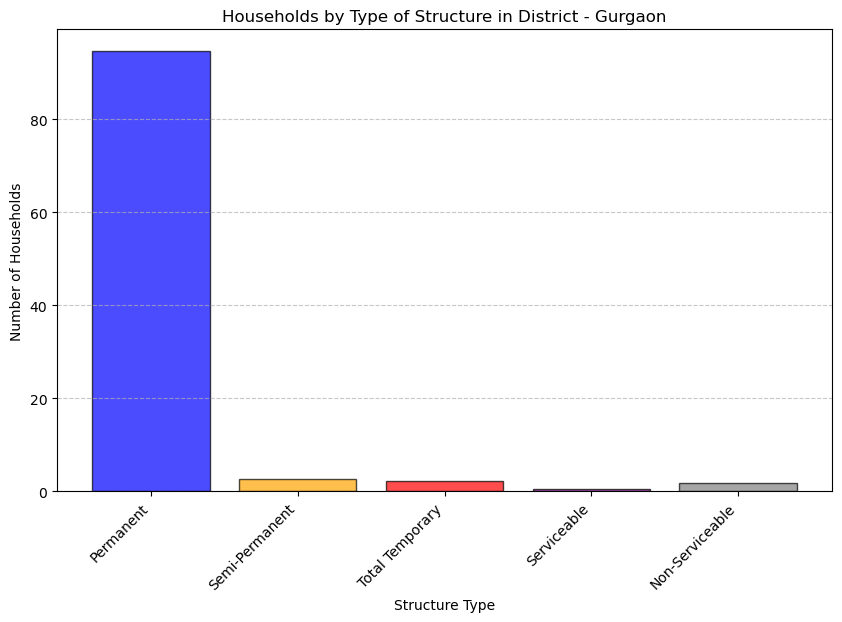

In [16]:
# Identifying the correct columns for type of structure
structure_cols = [
    "HOUSELISTING & HOUSING CENSUS, 2011 Households by Type of Structure of Census Houses",
    "HOUSELISTING & HOUSING CENSUS, 2011 Households by Type of Structure of Census Houses.1",
    "HOUSELISTING & HOUSING CENSUS, 2011 Households by Type of Structure of Census Houses.2",
    "HOUSELISTING & HOUSING CENSUS, 2011 Households by Type of Structure of Census Houses.3",
    "HOUSELISTING & HOUSING CENSUS, 2011 Households by Type of Structure of Census Houses.4"
]

# Selecting relevant columns
columns_to_plot = [area_col] + structure_cols

# Filtering dataset for relevant columns and dropping NaN values
df_filtered = df[columns_to_plot].dropna()

# Convert numerical columns to proper numeric format (ignoring errors for non-numeric values)
df_filtered[structure_cols] = df_filtered[structure_cols].apply(pd.to_numeric, errors='coerce')

# Renaming columns for better readability
df_filtered.columns = [
    "Area Name", "Permanent", "Semi-Permanent", "Total Temporary", "Serviceable", "Non-Serviceable"
]

# User-defined area to filter
selected_area = "District - Gurgaon"  # Change this to the area you want

# Filter dataset for the selected area
df_area = df_filtered[df_filtered["Area Name"] == selected_area]

# Plot type of structure distribution for the selected area
plt.figure(figsize=(10, 6))
plt.bar(df_area.columns[1:], df_area.iloc[0, 1:], 
        color=['blue', 'orange', 'red', 'purple', 'gray'],
        alpha=0.7, edgecolor='black')

# Customize the plot
plt.title(f"Households by Type of Structure in {selected_area}")
plt.xlabel("Structure Type")
plt.ylabel("Number of Households")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
